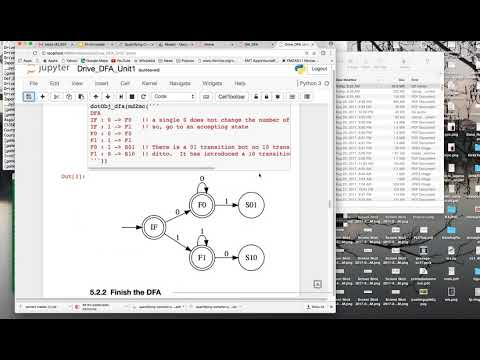

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('Bdr926TeQyQ')

__For the most fun, please do "Kernel, Restart and Clear Output", then run cell by cell.__

__Else it will show all the runs and outputs, thus taking away the suspense.__

# Basics of DFA

This unit is going to introduce you to the basics of Deterministic Finite Automata and Regular Languages.

We have recorded a Youtube video that will explain this notebook plus a few related things! This will serve as material for Lecture 4 and perhaps also later lectures.

<span style="color:blue"> **Youtube Video Tutorial of Jupyter** </span>

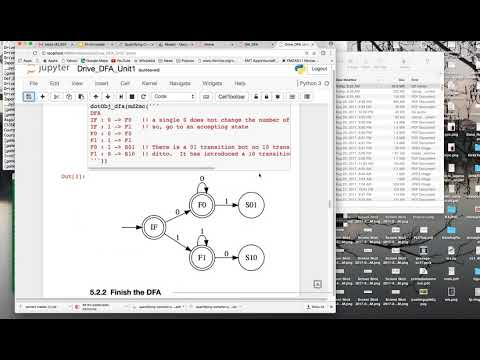

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Bdr926TeQyQ')

## Regular languages

Regular languages are one family (or set) of languages. (Both words "family" and "set" mean the same.)

A regular language is specified by drawing a DFA. Once you finish drawing a DFA, you would have defined a regular language. (We will soon tell you why you might want to take the trouble of drawing DFA and obtain regular languages. For now, we will finish defining terms.)  

Ultimately the aim is to not produce drawings. We aim to define a simple type of machine that represents goto based programs. we shall define the notion of a transition system and introduce a simple text-based markdown language that helps specify transition systems. Once the transition system is defined, a drawing can be automatically produced using utilities we provide. However we shall continue to say "draw a DFA" to mean "specify a transition system."

## There are an infinite number of DFAs that can denote the same regular language

Much like 1+1 and 3-1 both denote number 2, and there are an infinite number of arithmetic expressions that denote 2, there are an infinite number of transition systems that denote the same regular language. But usually we don't write 364-362 in order to convey "2" (e.g., you seldom order (364-362) pancakes in a restaurant.) The same way, you try to specify the simplest possible DFA to denote a particular regular language -- not an artificially bloated one.

However, with numbers, we know that "2" is simpler than (364-362). With DFA, don't worry: even if you did not draw the simplest DFA, there is an automated tool that we shall give you that creates the simplest DFA. Yes, there is a unique simplest DFA called the minimal DFA for each regular language.

## There are an infinite number of regular languages

Much like there are an infinite number of natural numbers, there are also an infinite number of regular languages. So let us get the two ideas of infinity introduced so far straight:

* Each natural number can be written in an infinite number of variants. E.g., 1 = 2-1 = 3-2 = 4-3 = ...
    - Similarly, each regular language can be denoted by an infinite number of DFA
  
  
* There are an infinite number of natural numbers, e.g., 0,1,2, ...
    - Similarly, there are an infinite number of regular languages

# Highly recommended intuitive first approach: DFA Drawings using JFLAP

We shall use the tool JFLAP to draw DFA and then run them. I will include some screenshots and/or a JFLAP screen recording here.
The first DFA specified will be to define the language of equal number of 01 and 10 changes. 

Think about this language a little bit. What strings may we include in this language? List all strings of length less than five in this language in numeric order. 

# Discarding the ''drawing crutch''

Dear student, draw away with JFLAP and we also have a software engineering project called Sinap that has a lot of potential. But let us face it:

* Drawing large diagrams is tedious - especially if you have to do the placement of nodes and edges
    - From a grading perspective, it will be a nightmare; each students' drawing will look different with non-standard state names chosen
    
    
* Drawings are not what we are after. We are programming a low-level machine
    - When we write assembly code, we don't throw the code lines around on "spaghetti lines". We comment each line, and carefully arrange them into semantically coherent blocks. DFA code is like assembly code and the same conventions must prevail here too.
    
    
* Large drawings will be a nightmare to maintain. The cop-out used in many automata courses is not to ask students to design large DFA. While we will introduce formalisms such as NFA and RE (regular expressions), waiting for them to arrive is no excuse not to try to design DFA directly, "complaining that their size is becoming unmanageable."
    - The markdown notation that we provide solves these problems in the following ways:
    
        * It standardizes state names in a very systematic way
        
        * It allows you to write each DFA transition as if it is a line of code, and also comment it
        
        * Last but not penultimate, it produces DFA drawings automatically, and also produces a runnable artifact that feeds into a rich DFA tool ecosystem
        
        * Last but not least, it helps illustrate the principles of scanning and parsing 


# Using Jove for DFA

We shall be using Jove's markdown notation to specify DFA. That will happen after a few necessary imports. When we evaluate these imports, we will be welcomed with a list of help messages saying you can seek further help about a whole slew of functions. I hope these functions and what they are supposed to mean should be somewhat clear from their names.

(** The listing order is slated for improvements. **)

In [3]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_DFA   import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



# Now we begin our work building DFA.

As we go along, we will also be teaching you how to "think DFA" so that you can code them up "straight from your head"


## Jove's markdown

Jove's markdown is designed to cover four machine types:

1. DFA
2. NFA
3. PDA
4. TM
 
There are only these four basic machine types one studies in most automata theory courses.

## Markdown syntax for DFA

The markdown syntax for DFA is quite simple. To understand what we are about to say below, kindly refer to Def_DFA.ipynb and un

Given that a DFA consists of a set of states, an initial state, a possibly empty set of final states, and a transition function, we want to have an arrangement by which we require the user to specify the least and infer everything else.

Thus we settle on a notation that specifies the transition function. We will add a few details that allows us to infer the initial and final states. Specifically, to describe a DFA:

* Specify a state with name beginning with I that will be the initial state (lower-case i is OK too)

* If the DFA in question has an initial state that is also a final state, let the state name begin with IF (lowercase if is OK)

* For final states, use a name that begins with F or f

* Then just specify-away transitions. 

### Example DFA

We will now specify the DFA whose language is the set of strings that have the same number of 01 and 10 transitions. We will specify the transitions below in markdown within triple quotes initially, and then present the same in a code cell.

We decide to include $\varepsilon$ as well as single occurrences of $0$ and $1$. These strings all trivially contain an equal number of 01 and 10 transitions.

Let us design this DFA bit by bit, this being our first example. We will show the final result under "putting it all together," below.

#### Initial state and the first few moves

We begin in state IF, meaning that it is initial and final. This is how we admit $\varepsilon$ into the machine's language. Now from IF, upon 0 or upon 1, we must still go to a final state, as the machine must accept a $0$ or a $1$ because a single $0$ or $1$ has an equal number of $01$ and $10$ changes -- meaning $0$ such!

We can even plot these partial DFA as we move along. Just don't run them -- that is all! 

** NOTE ** : When you present your solutions, present only the final product, and not every intermediate DFA

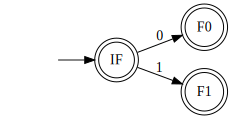

In [4]:
dotObj_dfa(md2mc('''
DFA
IF : 0 -> F0  !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1  !! so, go to an accepting state
'''))

#### Fully decode at every state, transitioning to appropriate states 

We now fill all other moves, decoding upon a 0 or a 1 at every state, keeping the overall semantics in mind.

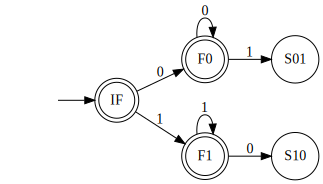

In [5]:
# Pick up from before, adding more lines to the DFA description
dotObj_dfa(md2mc('''
DFA
IF : 0 -> F0   !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1   !! so, go to an accepting state
F0 : 0 -> F0
F1 : 1 -> F1
F0 : 1 -> S01  !! There is a 01 transition but no 10 transition. So go to non-accepting state
F1 : 0 -> S10  !! ditto.  It has introduced a 10 transition without a  01 transition
'''))

### Finish the DFA

Now that we have made incremental progress and have our thoughts flowing, let's go ahead and
finish the DFA. Plus we also name the DFA object and hold onto it, and then also plot wrt that name.
See the details below.

In [6]:
# Pick up from before, adding more lines to the DFA description
EqChangeDFA = md2mc('''
DFA
!!--
IF : 0 -> F0   !! a single 0 does not change the number of 01 or 10 transitions
IF : 1 -> F1   !! so, go to an accepting state
F0 : 0 -> F0
F1 : 1 -> F1
F0 : 1 -> S01  !! There is a 01 transition but no 10 transition. So go to non-accepting state
F1 : 0 -> S10  !! ditto.  It has introduced a 10 transition without a  01 transition
S01: 1 -> S01  !! Remain in S01 as the 01 vs 10 balance has not been restored
S10: 0 -> S10  !! Similar reasoning as above
S01: 0 -> F0   !! Balance restored now!
S10: 1 -> F1   !! Balance restored now!
!!--- 
!! this finishes the construction, as we have accounted for all transitions
''')

In [7]:
# Let us view the internal Python representation of 
# DFA as an n-tuple (Q, Sigma, Delta, q0, F)
EqChangeDFA

{'Delta': {('F0', '0'): 'F0',
  ('F0', '1'): 'S01',
  ('F1', '0'): 'S10',
  ('F1', '1'): 'F1',
  ('IF', '0'): 'F0',
  ('IF', '1'): 'F1',
  ('S01', '0'): 'F0',
  ('S01', '1'): 'S01',
  ('S10', '0'): 'S10',
  ('S10', '1'): 'F1'},
 'F': {'F0', 'F1', 'IF'},
 'Q': {'F0', 'F1', 'IF', 'S01', 'S10'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

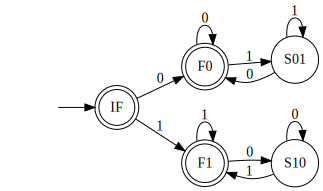

In [8]:
# Now let us view the DFA as a graph
dotObj_dfa(EqChangeDFA)

### Running a constructed DFA

We run a DFA by generating a collection of strings and generating the status of run (feeding it to accepts_dfa)
The full language of the DFA is infinitary, and so we won't present all of it (obviously) but only enough of it
to believe that we have built the correct DFA. Later we can check properties and conclude that the machine has
all the required moves.

In [9]:
from math import floor, log, pow
def nthnumeric(N, Sigma={'a','b'}):
    """Assume Sigma is a 2-sized list/set of chars (default {'a','b'}). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as Sigma[0] and 1 as Sigma[1].    
    """
    if (type(Sigma)==set):
       S = list(Sigma)
    else:
       assert(type(Sigma)==list
       ), "Expected to be given set/list for arg2 of nthnumeric."
       S = Sigma
    assert(len(Sigma)==2
          ),"Expected to be given a Sigma of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

In [10]:
tests = [ nthnumeric(i, ['0','1']) for i in range(19) ]
tests

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011']

In [11]:
tests = [ nthnumeric(i, ['0','1']) for i in range(19) ]
for t in tests:
    if accepts_dfa(EqChangeDFA, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

This DFA accepts  
This DFA accepts  0
This DFA accepts  1
This DFA accepts  00
This DFA rejects  01
This DFA rejects  10
This DFA accepts  11
This DFA accepts  000
This DFA rejects  001
This DFA accepts  010
This DFA rejects  011
This DFA rejects  100
This DFA accepts  101
This DFA rejects  110
This DFA accepts  111
This DFA accepts  0000
This DFA rejects  0001
This DFA accepts  0010
This DFA rejects  0011


## More DFA construction and experimentation

In [12]:
OddEnds1 = md2mc(''' !! This is a machine that accepts odd-length strings ending in 1
DFA                  !! Think about whether you can design this DFA in fewer than 3 states
I : 0 -> A
A : 0 | 1 -> I
I : 1 -> F
F : 0 | 1 -> I
''')

In [13]:
dot_OddEnds1 = dotObj_dfa(OddEnds1)

In [14]:
OddEnds1

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

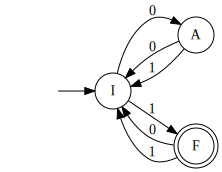

In [15]:
# A simple optional argument: edges not fused
dotObj_dfa(OddEnds1)

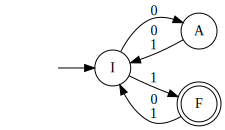

In [16]:
# A simple optional argument for fusing multiple edges
dotObj_dfa(OddEnds1, FuseEdges=True)

## DFA for recognizing that the second-last character is a 1

In [17]:
secondLastIs1 = md2mc('''
!!------------------------------------------------------------
!! This DFA looks for patterns of the form ....1.
!! i.e., the second-last (counting from the end-point) is a 1
!!
!! DFAs find such patterns "very stressful to handle",
!! as they are kept guessing of the form  'are we there yet?'
!! 'are we seeing the second-last' ?
!! They must keep all the failure options at hand. Even after
!! a 'fleeting glimpse' of the second-last, more inputs can
!! come barreling-in to make that "lucky 1" a non-second-last.
!!
!! We take 7 states in the DFA solution.
!!------------------------------------------------------------

DFA
!!------------------------------------------------------------
!! State : in ->  tostate !! comment
!!------------------------------------------------------------

I   :  0 ->  S0  !! Enter at init state I
I   :  1 ->  S1  !! Record bit seen in state letter
                     !! i.e., S0 means "state after seeing a 0"
			 
S0  :  0 ->  S00 !! continue recording input seen
S0  :  1 ->  S01 !! in state-letter. This is a problem-specific
                 !! way of compressing the input seen so far.

S1  :  0 ->  F10 !! We now have a "second last" available!
S1  :  1 ->  F11 !! Both F10 and F10 are "F" (final)

S00 :  0 ->  S00 !! History of things seen is still 00
S00 :  1 ->  S01 !! Remember 01 in the state

S01 :  0 ->  F10 !! We again have a second-last of 1
S01 :  1 ->  F11 !! We are in F11 because of 11 being last seen

F10 :  0 ->  S00 !! The second-last 1 gets pushed-out
F10 :  1 ->  S01 !! The second-last 1 gets pushed-out here too

F11 :  0 ->  F10 !! Still we have a second-last 1
F11 :  1 ->  F11 !! Stay in F11, as last two seen are 11

!!------------------------------------------------------------
''')

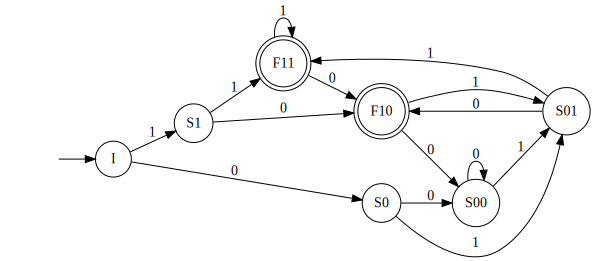

In [18]:
dotObj_dfa(secondLastIs1)

In [19]:
tests = [ nthnumeric(i, ['0','1']) for i in range(22) ]
for t in tests:
    if accepts_dfa(secondLastIs1, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

This DFA rejects  
This DFA rejects  0
This DFA rejects  1
This DFA rejects  00
This DFA rejects  01
This DFA accepts  10
This DFA accepts  11
This DFA rejects  000
This DFA rejects  001
This DFA accepts  010
This DFA accepts  011
This DFA rejects  100
This DFA rejects  101
This DFA accepts  110
This DFA accepts  111
This DFA rejects  0000
This DFA rejects  0001
This DFA accepts  0010
This DFA accepts  0011
This DFA rejects  0100
This DFA rejects  0101
This DFA accepts  0110


In [20]:
help(run_dfa)

Help on function run_dfa in module jove.Def_DFA:

run_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: next state of D["q0"] via string s



== THIS FINISHES OUR STUDY OF DFA ON 8/31/17 ==

Watch out for Drive_DFA_Unit2 soon.